https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

1) FRESH: annual spending (m.u.) on fresh products (Continuous);<br>
2) MILK: annual spending (m.u.) on milk products (Continuous);<br>
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);<br>
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)<br>
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)<br>
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);<br>
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)<br>
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

Relevant Papers:

Cardoso, Margarida G.M.S. (2013). Logical discriminant models â€“ Chapter 8 in Quantitative Modeling in Marketing and Management Edited by Luiz Moutinho and Kun-Huang Huarng. World Scientific. p. 223-253. ISBN 978-9814407717

Jean-Patrick Baudry, Margarida Cardoso, Gilles Celeux, Maria JosÃ© Amorim, Ana Sousa Ferreira (2012). Enhancing the selection of a model-based clustering with external qualitative variables. RESEARCH REPORT NÂ° 8124, October 2012, Project-Team SELECT. INRIA Saclay - ÃŽle-de-France, Projet select, UniversitÃ© Paris-Sud 11

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/wholesome_customers_data.csv')

In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<AxesSubplot:xlabel='Milk', ylabel='Grocery'>

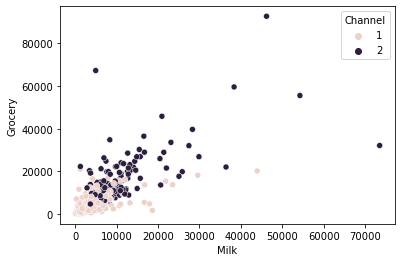

In [4]:
sns.scatterplot(data=df, x='Milk', y='Grocery', hue='Channel')

<AxesSubplot:xlabel='Milk', ylabel='Count'>

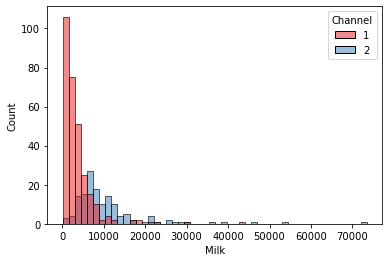

In [5]:
sns.histplot(data=df, x='Milk', hue='Channel', palette='Set1')

In [6]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


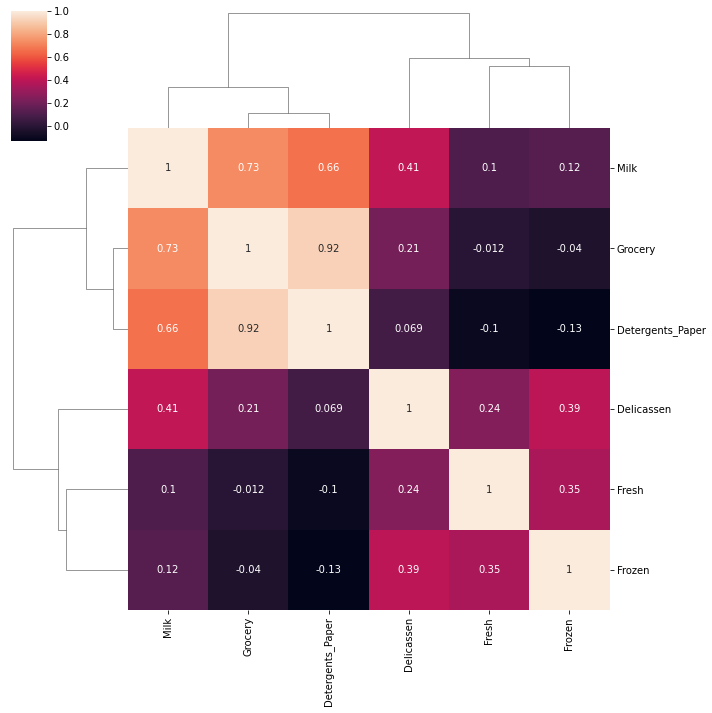

In [7]:
sns.clustermap(df.drop(['Channel', 'Region'], axis=1).corr(), annot=True)

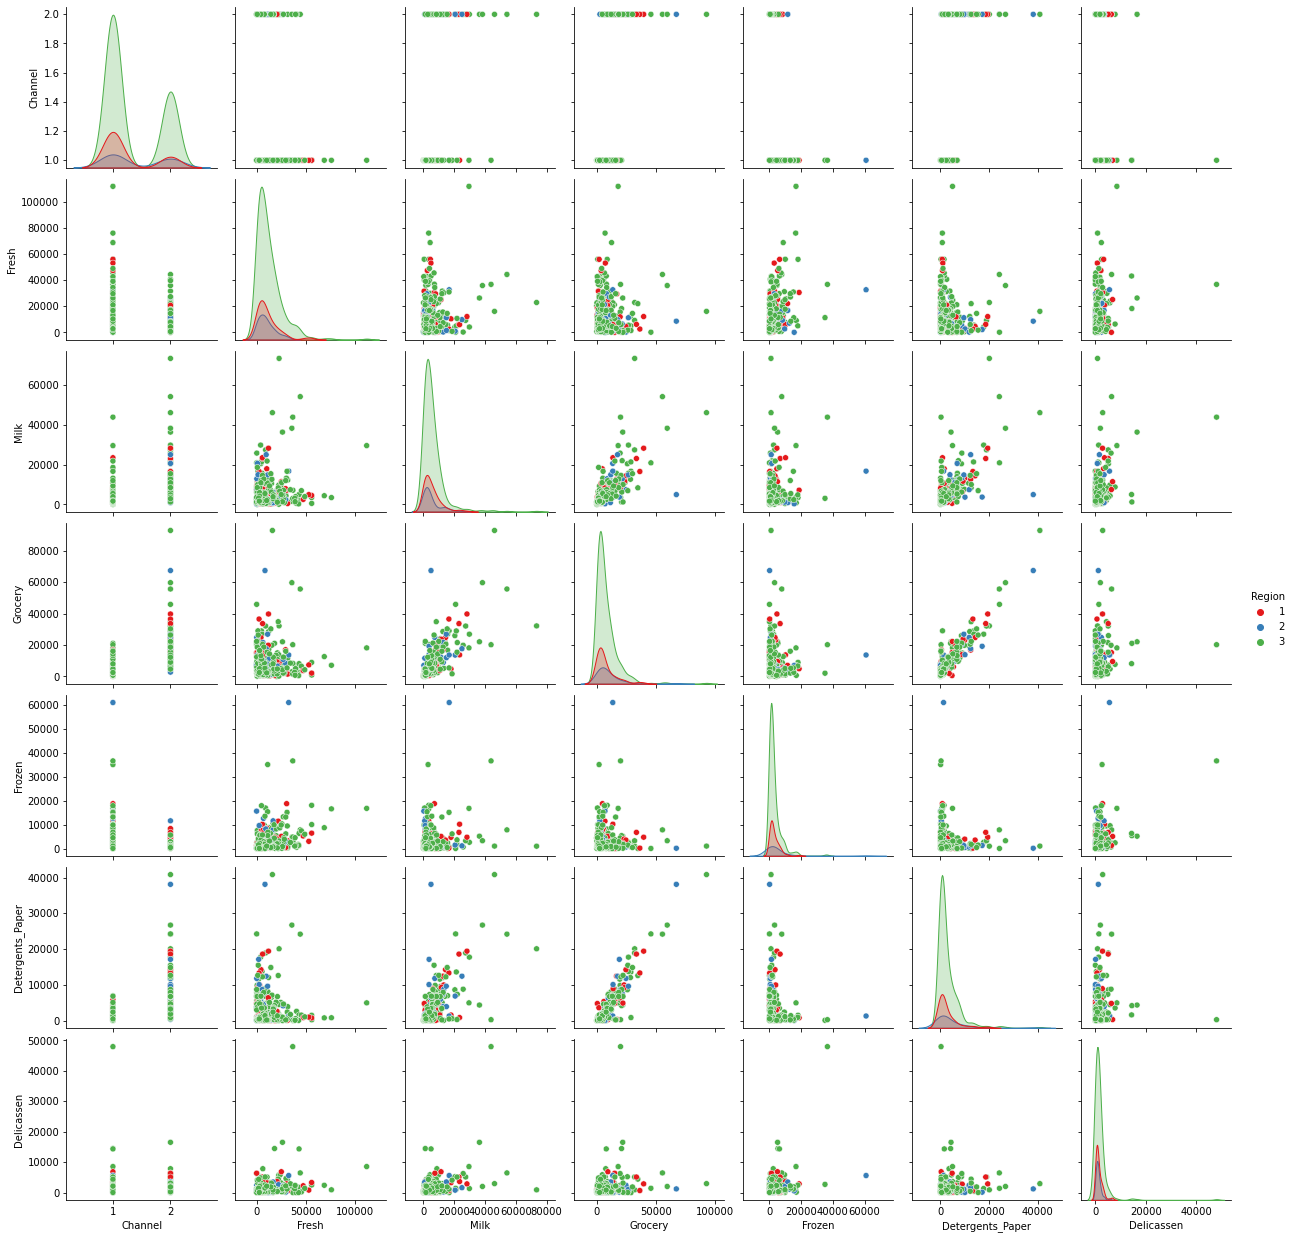

In [8]:
sns.pairplot(data=df, hue='Region', palette='Set1')

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
scaled_df = scaler.fit_transform(df)

In [12]:
scaled_df

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
len(df.columns)

8

In [15]:
model = DBSCAN(eps=1, min_samples=16)
labels = model.fit_predict(scaled_df)

In [16]:
np.sum(model.labels_ == -1)

116

In [17]:
len(scaled_df)

440

In [18]:
outlier_percentage = []
number_of_outliers = []

for eps in np.linspace(0.001, 3, 100):
    model = DBSCAN(eps=eps, min_samples=16)
    labels = model.fit_predict(scaled_df)
    
    number_of_outliers.append(np.sum(model.labels_ == -1))
    outliers = 100*np.sum(model.labels_ == -1) / len(scaled_df)
    outlier_percentage.append(outliers)

Text(0.5, 0, 'Epsilon Value')

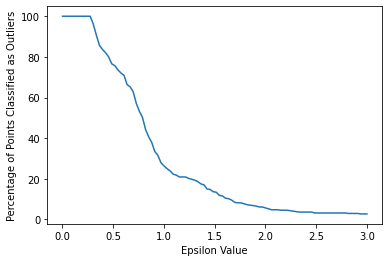

In [19]:
plt.plot(np.linspace(0.001, 3, 100), outlier_percentage)
plt.ylabel('Percentage of Points Classified as Outliers')
plt.xlabel('Epsilon Value')

Text(0.5, 0, 'Epsilon Value')

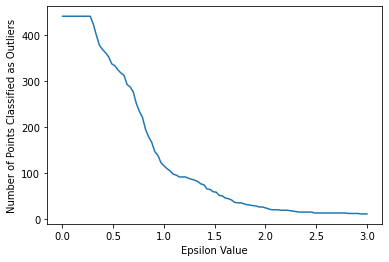

In [20]:
plt.plot(np.linspace(0.001, 3, 100), number_of_outliers)
plt.ylabel('Number of Points Classified as Outliers')
plt.xlabel('Epsilon Value')

Based on the plots above, let's pick eps =2

In [21]:
model = DBSCAN(eps=2, min_samples=16)

In [22]:
labels = model.fit_predict(scaled_df)

In [23]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [24]:
df['labels'] = labels

In [26]:
feat = df.groupby('labels').mean()

In [27]:
feat

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
-1,1.52,2.480000,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,2.00,2.620155,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,1.00,2.513986,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
MMscaler = MinMaxScaler()

In [31]:
scaled_feat = MMscaler.fit_transform(feat)

In [32]:
scaled_feat

array([[0.52      , 0.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 0.28040821, 0.44455106,
        0.        , 0.5000874 , 0.07374055],
       [0.        , 0.24248871, 0.2101965 , 0.        , 0.        ,
        0.1664745 , 0.        , 0.        ]])

In [34]:
scaled_feat = pd.DataFrame(data=scaled_feat, index=feat.index, columns=feat.columns)

In [35]:
scaled_feat

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
labels,,,,,,,,
-1,0.52,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,1.00,1.000000,0.000000,0.280408,0.444551,0.000000,0.500087,0.073741
1,0.00,0.242489,0.210196,0.000000,0.000000,0.166475,0.000000,0.000000


<AxesSubplot:ylabel='labels'>

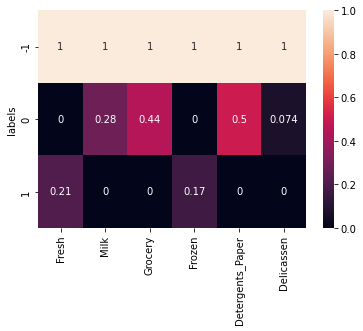

In [44]:
sns.heatmap(scaled_feat.drop(['Channel', 'Region'], axis=1), annot=True)

In [40]:
temp = scaled_feat.iloc[1:]

<AxesSubplot:ylabel='labels'>

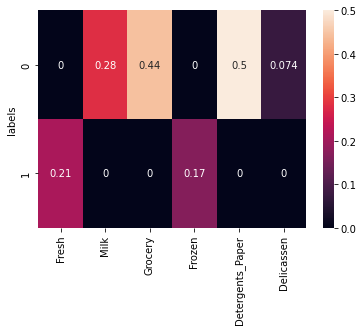

In [45]:
sns.heatmap(temp.drop(['Channel', 'Region'], axis=1), annot=True)

One cluster bought a lof of Detergents_Paper and the other did not.

In [49]:
df['labels'].value_counts()

 1    286
 0    129
-1     25
Name: labels, dtype: int64